In [7]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist

In [8]:
(x_train, y_train), (x_test,y_test) = mnist.load_data()

In [9]:
print('train set:', x_train.shape, y_train.shape)
print('test set:', x_test.shape, y_test.shape)

train set: (60000, 28, 28) (60000,)
test set: (10000, 28, 28) (10000,)


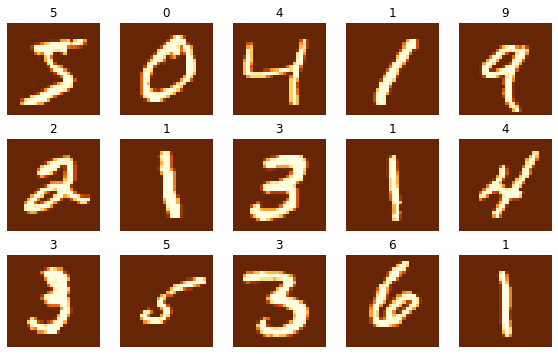

In [16]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(3,5)
fig.set_size_inches(8,5)
for i in range(15):
  ax = axes[i//5, i%5]
  ax.imshow(x_train[i], cmap='YlOrBr_r')
  ax.axis('off')
  ax.set_title(str(y_train[i]))

plt.tight_layout()
plt.show()

In [47]:
x_train[0,10:15,10:15]

array([[0.00392157, 0.60392157, 0.99215686, 0.35294118, 0.        ],
       [0.        , 0.54509804, 0.99215686, 0.74509804, 0.00784314],
       [0.        , 0.04313725, 0.74509804, 0.99215686, 0.2745098 ],
       [0.        , 0.        , 0.1372549 , 0.94509804, 0.88235294],
       [0.        , 0.        , 0.        , 0.31764706, 0.94117647]])

In [18]:
print(f'정규화 전 => 최소값: {x_train.min()}, 최대값: {x_train.max()}')

정규화 전 => 최소값: 0, 최대값: 255


In [19]:
# 데이터 정규화
x_train = x_train / x_train.max()

In [20]:
print(f'정규화 후 => 최소값 : {x_train.min()}, 최대값 : {x_train.max()}')

정규화 후 => 최소값 : 0.0, 최대값 : 1.0


In [21]:
x_test = x_test/ x_test.max()

In [22]:
# Flatten layer
print(f'변경전 shape: {x_train.shape}')
print(f'1D 로 변경 후: {x_train.reshape(60000,-1).shape}')

변경전 shape: (60000, 28, 28)
1D 로 변경 후: (60000, 784)


In [23]:
print(f'Flatten 적용 후 : {tf.keras.layers.Flatten()(x_train).shape}')

Flatten 적용 후 : (60000, 784)


In [24]:
# 활성화 함수
tf.keras.layers.Dense(128,activation='relu')
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128),
    tf.keras.layers.Activation('relu')
])

In [25]:
# 입력과 출력
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    # 마지막 노드는 분류의 카테고리 수 만큼 지정!!!
    tf.keras.layers.Dense(10, activation='softmax')
])

In [28]:
# 출력층 노드 = 1인 경우, sigmoid
tf.keras.layers.Dense(1, activation='sigmoid')

# 출력층 노드 = 2개 이상인 경우, softmax
tf.keras.layers.Dense(10, activation='softmax')

In [29]:
# 손실함수(코스트, 에러, 오차)
# 이진 분류(출력 노드가 = 1, sigmoid 인 경우)
model.compile(loss='binary_crossentropy')

In [30]:
# 출력 노드가 = 2개 이상일 때
# y 원핫 인코딩 일 때
# [0.,0.,0.,0.,0.,1.,0.,0.,0.,0.]
model.compile(loss='categorical_crossentropy')

In [31]:
# y 가 sparse 일 때 (레이블 엔코딩)
model.compile(loss='lsparse_categorical_crossentropy')

In [39]:
# 옵티마이저 (최적화 함수)
adam = tf.keras.optimizers.Adam(lr=0.001)
model.compile(optimizer=adam)

In [40]:
model.compile(optimizer='adam')

In [41]:
# 평가 지표
acc = tf.keras.metrics.SparseCategoricalAccuracy()
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=[acc])

In [42]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [43]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [44]:
# 훈련
model.fit(x_train,y_train,
          # 검증셋
          validation_data=(x_test, y_test),
          epochs=10,)

Epoch 1/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0184 - acc: 0.9939 - val_loss: 0.0884 - val_acc: 0.9789
Epoch 2/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.0178 - acc: 0.9944 - val_loss: 0.0868 - val_acc: 0.9804
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0136 - acc: 0.9955 - val_loss: 0.0942 - val_acc: 0.9815
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0165 - acc: 0.9951 - val_loss: 0.0857 - val_acc: 0.9827
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0134 - acc: 0.9958 - val_loss: 0.1021 - val_acc: 0.9803
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0121 - acc: 0.9965 - val_loss: 0.1076 - val_acc: 0.9800
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0129 - acc: 0.9963 - val_loss: 0.1167 - val_acc: 0.9794
Epoch 8/10
1875/1875 [==============================] - 8s 4m